This notebook discusses NRLEE nucleosynthesis via Jupyter technology.  As you read through the text, you can execute the code blocks.  You can change input (for example, choose different axis ranges or different species to show in the plots).  If your current version gets corrupted, don't worry.  Simply quit and download a new copy from GitHub, or start up a new version on Google Colab.

## Table of Contents:

[Introduction](#introduction)<br/>
[Preliminaries](#preliminaries)<br/>
[Pre-explosion nucleosynthesis](#pre-explosion)<br/>
[Explosive nucleosynthesis](#explosive)<br/>
[Movies](#movies)

<a id='introduction'></a>
# Introduction


Here is the anatomy of a NRLEE:
    
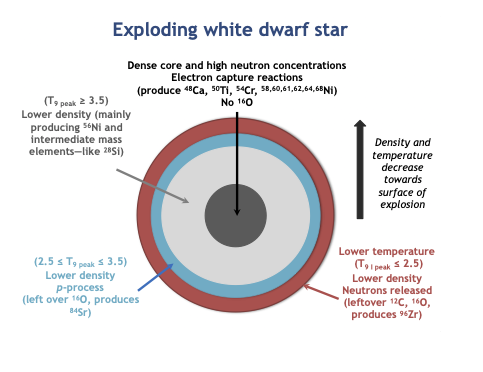

TODO:  obviously more text setting up the idea.

<a id='preliminaries'></a>
# Preliminaries

This notebook explores NRLEE nucleosynthesis via output from a series of single-zone network calculations.  To study this nucleosynthesis, first import the necessary packages and download the necessary data.

In [1]:
import sys
!{sys.executable} -m pip install --quiet wnutils
!{sys.executable} -m pip install --quiet urllib3

The next step is to import the package to check for and retrieve the data:

In [2]:
import os.path
from os import path
import urllib.request

The following code block next checks whether the data exist locally, and, if not, retrieves and unpacks them.

In [3]:
if not path.exists('output'):
    url = 'http://nucnet-tools.sourceforge.net/data_pub/nrlee/2021-03-19/output.tar.gz'
    filename = 'output.tar.gz'
    urllib.request.urlretrieve(url,filename)
    !tar zxvf output.tar.gz

This notebook uses [wnutils](https://wnutils.readthedocs.io) to analyze the nucleosyntheis [XML](https://www.w3.org/TR/REC-xml/) output, so the next code block imports that package.  It also imports the matplotlib, numpy packages, and the package for displaying animations.

In [4]:
import wnutils.xml as wx
import wnutils.multi_xml as mx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

The next step is to read in the data from the various calculations.

In [5]:
h = wx.Xml('output/h_burn/out.xml')
he = wx.Xml('output/he_burn/out.xml')
sproc = wx.Xml('output/s-process/out.xml')
exp_tau = wx.Xml('output/s-process/exp_tau.xml')
outer = wx.Xml('output/outer_layers/full.xml')
outer_zone = wx.Xml('output/outer_layers/out_1.00.xml')
inner = wx.Xml('output/inner_layers/full.xml')
inner_zones = mx.Multi_Xml(['output/inner_layers/out_3.02e+09.xml', 'output/inner_layers/out_7.59e+09.xml'])

<a id='pre-explosion'></a>

# Pre-explosion nucleosynthesis

## Hydrogen burning

The first nucleosynthesis stage in the star's life was hydrogen burning.  This was modeled at constant temperature and density with initial solar composition, as given by [Lodders](https://ui.adsabs.harvard.edu/abs/2003ApJ...591.1220L/abstract).  The conditions are printed in the next cell.

In [6]:
props = h.get_properties_as_floats(['time', 't9', 'rho'])
print('For the calculation, the duration, temperature, and density were:')
print('   time (Gyr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e17))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))

For the calculation, the duration, temperature, and density were:
   time (Gyr) = 3.00e+00
   T (K) = 2.00e+07
   mass density (g/cc) = 2.00e+01


In hydrogen burning, the initial $^1$H burns to $^4$He.  For stars greater than about 1.3 times the mass of the Sun, this occurs via [CNO cycling](https://en.wikipedia.org/wiki/CNO_cycle).  Note that the mass fraction of a species is the fraction of the total mass of the system that is in that species.  It is thus the grams of that species per gram of material.  Core hydrogen burning occurs largely non-convectively in stars that leave behind white dwarf remnants.  Typically about 10% of the star (by mass) undergoes core hydrogen burning.

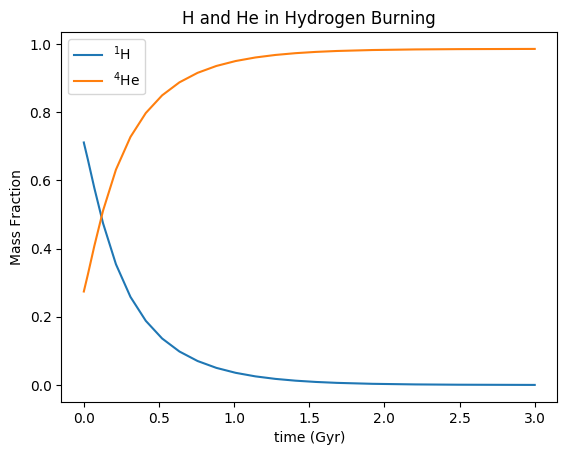

In [7]:
species = ['h1', 'he4']
h.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e17, xlabel='time (Gyr)',
                                  use_latex_names = True, title='H and He in Hydrogen Burning')

## Helium burning

Once the star exhausts its core hydrogen, it contracts and heats up.  Shell hydrogen burning ignites in the hydrogen-rich layers outside the hydrogen exhausted core.  This burning adds to the size of the helium-rich core.  Evenutally, helium burning ignites in the core.  For the present calculation, this burning stage was again modeled with constant temperature and density, and the conditions are printed in the next cell.

In [8]:
props = he.get_properties_as_floats(['time', 't9', 'rho'])
print('For the calculation, the duration, temperature, and density were:')
print('   time (yr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e7))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))

For the calculation, the duration, temperature, and density were:
   time (yr) = 2.00e+05
   T (K) = 2.00e+08
   mass density (g/cc) = 1.00e+03


Helium burning occurs via the [triple-alpha process](https://en.wikipedia.org/wiki/Triple-alpha_process).  It creates $^{12}$C and $^{16}$O from the initial $^4$He.

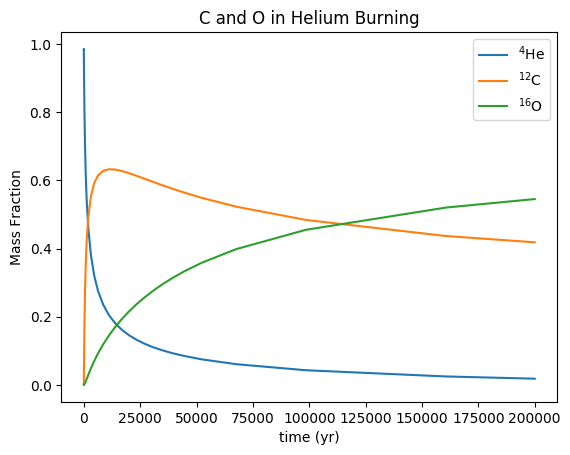

In [9]:
species = ['he4', 'c12', 'o16']
he.plot_mass_fractions_vs_property('time', species, xfactor = 3.15e7, xlabel='time (yr)',
                                   use_latex_names = True, title = 'C and O in Helium Burning')

Helium burning creates a carbon/oxygen core in the star.  If the core becomes [degenerate](https://en.wikipedia.org/wiki/Degenerate_matter#Degenerate_gases) at this stage, it is able to sustain itself against further gravitational contraction without further nuclear burning.  The reason is that radiation loss normally leads to a loss of energy from the core, which means the pressure decreases.  Nuclear burning releases energy and maintains the necessary pressure.  For degenerate matter, however, the pressure is simply maintained by the fact that no two electrons can exist in the same quantum mechanical state (the [Pauli exclusion principle](https://en.wikipedia.org/wiki/Pauli_exclusion_principle)).  At high density, this fact allows there to be strong pressure even at low temperature.



## S process

Outside the carbon/oxygen core, helium-rich matter exists and can undergo helium burning.  The ashes of this burning ($^{12}$C and $^{16}$O) settle onto the core and increase the core's mass.  The burning is in fact a complicated and alternating interplay of shell helium burning and shell hydrogen burning outside the helium burning, with mixing occurring between the various shell burnings.  This is the burning that occurs during the star's life on the [asymptotic giant branch](https://en.wikipedia.org/wiki/Asymptotic_giant_branch) (AGB).  During this phase, [s-processing](https://en.wikipedia.org/wiki/S-process) can occur.

The present calculation modeled s-process nucleosynthesis by running the ashes of helium burning at constant temperature, density, and neutron density, which are printed in the next cell.

In [10]:
props = sproc.get_properties_as_floats(['time','t9', 'rho'])
x_n = sproc.get_mass_fractions(['n'])['n']
n_n = x_n[len(x_n)-1] * props['rho'][len(props['rho'])-1] * 6.022e23
print('For the calculation, the duration, temperature, mass density, and neutron density were:')
print('   time (yr) = {0:.2e}'.format(props['time'][len(props['time'])-1] / 3.15e7))
print('   T (K) = {:.2e}'.format(props['t9'][len(props['t9'])-1] * 1.e9))
print('   mass density (g/cc) = {:.2e}'.format(props['rho'][len(props['rho'])-1]))
print('   neutron density (per cc) = {:.2e}'.format(n_n))

For the calculation, the duration, temperature, mass density, and neutron density were:
   time (yr) = 1.00e+05
   T (K) = 2.50e+08
   mass density (g/cc) = 1.00e+03
   neutron density (per cc) = 1.00e+08


A convenient parameter for discussion of the evolution of the neutron captures is the neutron exposure $\\tau$.  It is mathematically defined as $\tau(t) = \int_0^t n_n(t') v_T(t') dt'$, where $n_n(t)$ is the neutron density (number of neutrons per cubic centimeter) at time $t$ and $v_T(t)$ is the thermal velocity of the neutrons at time $t$.  Physically, the exposure is the total number of neutrons that pass through an area in duration from time 0 to $t$.  For s-process studies, it is convenient to use the units inverse millibarns, where a millibarn, 1/1000 of a [barn](https://en.wikipedia.org/wiki/Nuclear_cross_section), has units $10^{-27}$ cm$^2$.  The following code block shows the evolution of the neutron exposure in the calculation as a function of time.  Since the neutron density and temperature were held constant in the calculation, the exposure rises linearly with the time.

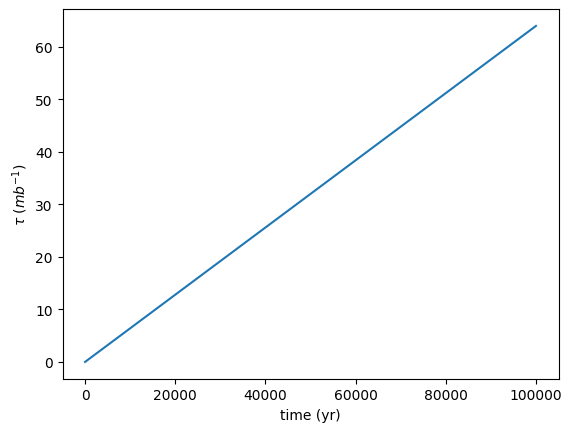

In [11]:
sproc.plot_property_vs_property('time', ('exposure','n'), xfactor = 3.15e7, xlabel='time (yr)',
                                ylabel='$\\tau\ (mb^{-1})$')

The evolution of the abundances vs. mass number with exposure is best seen via an [animation](#s-process-movie)

The ensemble of nuclei undergoing s-process nucleosynthesis does not see a single neutron exposure but, because of the complicated interplay of hydrogen and helium shell burning in the AGB star, experiences rather a distribution $\rho(\tau)$ of such exposures.  Early [studies](https://ui.adsabs.harvard.edu/abs/1974ApJ...193..397C/abstract) used an exponential distribution of exposures such that $\rho(\tau) = \frac{1}{\tau_0} e^{-\tau/\tau_0}$, where $\tau_0$ is the mean exposure.  For such a distribution, most nuclei see little exposure and a smaller fraction of nuclei see larger exposures.  Those early studies found that an exponential distribution with $\tau_0 = 0.3\ mb^{-1}$ fits the solar s-process abundance distribution fairly well.  The current model uses such a distribution, and the next code block shows the abundance distribution that results when the abundances for the model are weighted by this distribution.

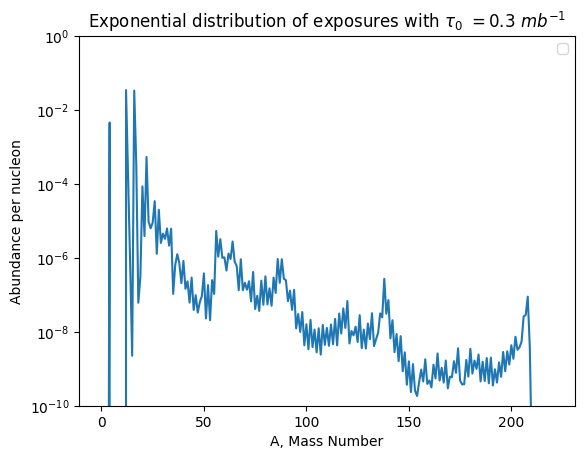

In [12]:
exp_tau.plot_abundances_vs_nucleon_number(ylim=[1.e-10,1], xlabel='A, Mass Number', ylabel='Abundance per nucleon',\
                                          yscale='log', title = 'Exponential distribution of exposures with $\\tau_0\ = 0.3\ mb^{-1}$',
                                          legend="")

Plot outer layers.   TODO:  add discussion.  Add single zone calculations (animations?) to show production of 96Zr and 84Sr.

<a id='explosive'></a>

# Explosive nucleosynthesis

## Outer layers

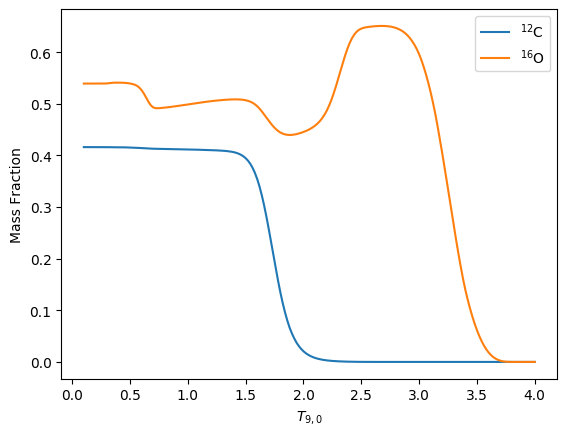

In [13]:
species = ['c12', 'o16']
outer.plot_mass_fractions_vs_property('t9_0', species, xlabel='$T_{9,0}$', use_latex_names=True)

Plot other species in outer layers.

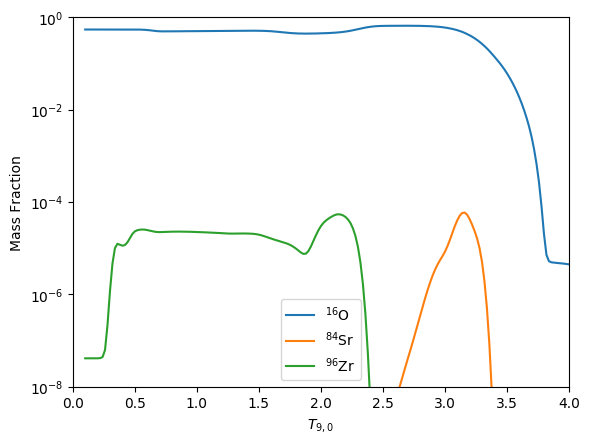

In [14]:
species = ['o16', 'sr84', 'zr96']
outer.plot_mass_fractions_vs_property('t9_0', species, xlabel='$T_{9,0}$', use_latex_names=True, \
                                      yscale='log', xlim = ([0,4]), ylim=[1.e-8,1.])

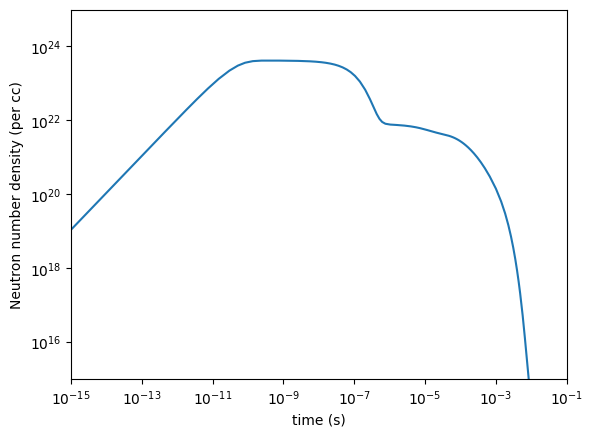

In [15]:
props = outer_zone.get_properties_as_floats(['time', 'rho'])
x = outer_zone.get_mass_fractions(['n'])
plt.plot(props['time'], x['n'] * props['rho'] * 6.022e23)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1.e-15,0.1])
plt.ylim([1.e15,1.e25])
plt.xlabel('time (s)')
plt.ylabel('Neutron number density (per cc)')
plt.show()

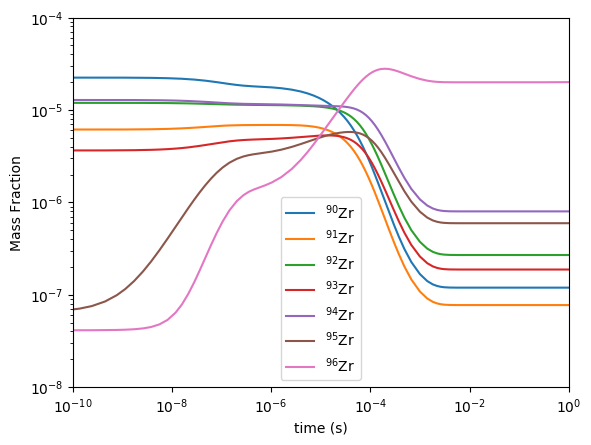

In [16]:
species = ['zr90', 'zr91', 'zr92', 'zr93', 'zr94', 'zr95', 'zr96']
outer_zone.plot_mass_fractions_vs_property('time', species,
                                          xscale = 'log', yscale = 'log', xlim = [1.e-10,1], ylim = [1.e-8,1.e-4],
                                          xlabel = 'time (s)', use_latex_names = True)

## Inner layers

Plot the electron fraction ($Y_e$) as a function of time in two zones with different initial density.

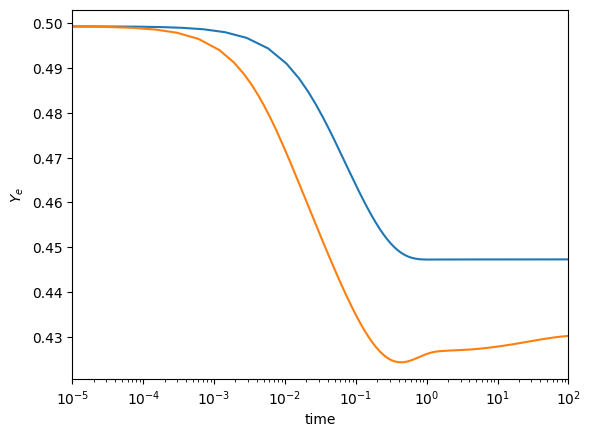

In [17]:
inner_zones.plot_property_vs_property('time', ('moment_abund', '0', 'abundance'), xscale = 'log', 
                                      xlim = [1.e-5,100], ylabel = '$Y_e$')

Plot the final electron fraction as a function of initial density.

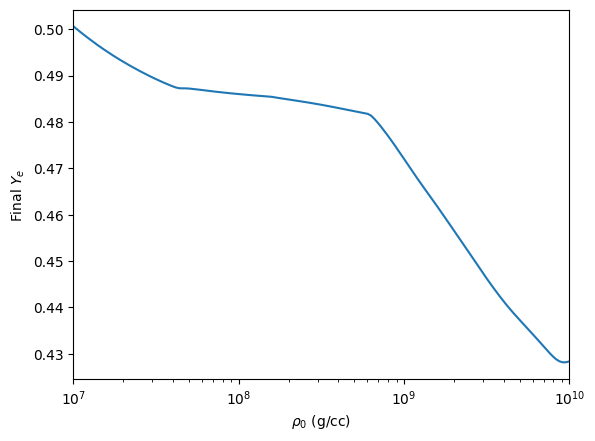

In [18]:
inner.plot_property_vs_property('rho_0', ('moment_abund', '0', 'abundance'), xscale = 'log',
                                xlim = [1.e7, 1.e10], xlabel = '$\\rho_0$ (g/cc)', ylabel = 'Final $Y_e$')

Plot the final mass fractions of abundant species as a function of initial density.

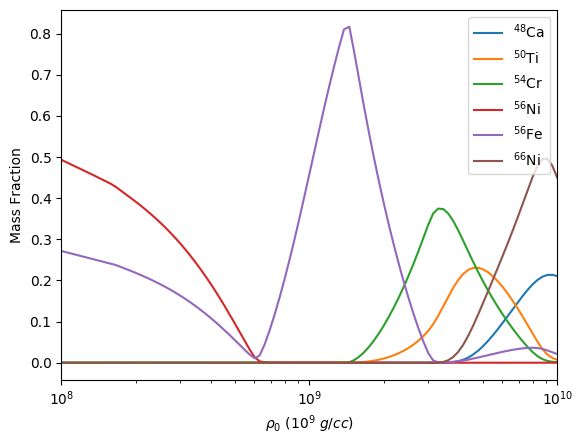

In [19]:
species = ['ca48', 'ti50', 'cr54', 'ni56', 'fe56', 'ni66']
inner.plot_mass_fractions_vs_property('rho_0', species, xlabel='$\\rho_0\\ (10^9\\ g/cc)$', use_latex_names=True,\
                                      xscale = 'log', xlim=[1.e8,1.e10])

<a id='movies'></a>

# Movies

Because the movies take some time to generate, they are not created by default.  To create the movie, change the *create_movie* variable in the given cell from *False* to *True* and execute the cell.

## S-Process abundances versus neutron exposure

<a id='s-process-movie'></a>

This cell creates an animation showing how the abundances as a function mass number evolve with increasing neutron exposure in the s process.  Note that the abundances are relative to the total number of nucleons in the system.  One may also think of this scaling as the moles of the species per mole of nucleons, or, as the number of moles of the species per gram of material.

Neutron captures and beta decays increase the mass of the original seed nuclei (the ashes of hydrogen burning plus Solar abundances for elements heavier than silicon).  This causes the "upward" movement in mass number in the movie below.  The neutron capture s-process chain terminates at $^{209}$Bi by the loop $^{209}{\rm Bi} + n \ \to ^{210}{\rm Bi} + \gamma$, followed by $^{210}{\rm Bi} \to ^{210}{\rm Po} + e^- + \nu_e)^{210}$, and then $^{210}{\rm Po} \to ^{206}{\rm Pb} + \alpha$.  The $^{206}$Pb then undergoes further neutron capture and beta decay to $^{209}$Bi to complete the cycle.  Any nuclei entering the cycle from lower mass get caught up in it, leading to build up of the Pb and Bi isotopes.

The "bouncing" behavior one can see at late time (large exposure) results from the fact that the abundance pattern achieves a steady-state form above mass number 90 or so.  For any species in the chain, neutron capture or beta decay into that species is balanced by capture or decay out.  The overall level of the steady-state pattern is then set by the flow of abundance into the chain from lower mass number.  As this flow varies due to variations in the neutron-capture flow from the lower-mass seed nuclei, the overall pattern rises or falls.

The default zone XPath selects time steps after one year in the calculation and with exposure less than 20 inverse millibarns.  To select all time steps, uncomment the following *my_xpath* line (that is, remove the # to select *my_xpath = ""*).

In [20]:
create_movie = False    # To create the movie, change False to True and execute the cell.

if create_movie:
    
    def my_title(props, i):
        title_str = \
        "$\\tau$ = %4.2f ($mb^{-1}$)" % \
        (props[('exposure', 'n')][i])
        return (title_str, {'fontsize': 14, 'color': 'black'})
    
    my_xpath = "[(optional_properties/property[@name = 'exposure' and @tag1 = 'n'] < 20) and \
                 (optional_properties/property[@name = 'time'] > 3.15e7)]"
    #my_xpath = ""

    props = sproc.get_properties_as_floats([('exposure', 'n')], zone_xpath = my_xpath)
    bind = lambda i: my_title(props, i)

    my_extraPlot={"[position()=1]": {'lw': 0.3, 'color': 'blue', 'label': 'Initial'}}

    anim = sproc.make_abundances_vs_nucleon_number_movie(zone_xpath = my_xpath, ylim = [1.e-10,1], yscale = 'log',
                                                      xlim = [0,250], xlabel = 'Mass Number, A',
                                                      ylabel = 'Abundance per nucleon', extraPlot = my_extraPlot,
                                                      plotParams={'label': 'Current'},
                                                      legend={'loc': 'upper right'}, title_func = bind)
    display(HTML(anim.to_jshtml()))

## Isotope abundance chain movie

Create an isotopic abundance chain movie.  The variable *my_Z* selects the element.  The variables *start*, *stop*, and *step* delineate the range and set the tick marks along the abscissa.

In [21]:
create_movie = False    # To create the movie, change False to True and execute the cell.

if create_movie:
    my_Z = 40
    start = 88
    stop = 110
    step = 2
    
    my_xticks = np.arange(start, 1.01*stop, step)
    my_xlim = [my_xticks[0], my_xticks[len(my_xticks)-1]]
    
    my_extraPlot={"[position()=1]": {'lw': 0.3, 'color': 'blue', 'label': 'Initial'}}

    anim = outer_zone.make_abundance_chain_movie(nucleon=('z', my_Z), xlim = my_xlim, ylim = [1.e-10, 1.e-6],
                                                 yscale='log', plot_vs_A = True, xticks = my_xticks,
                                                 extraPlot = my_extraPlot, plotParams={'label': 'Current'},
                                                 legend={'loc': 'upper right'})
    
    display(HTML(anim.to_jshtml()))

## Elemental abundance movie

Create an elemental abundance movie.

In [22]:
create_movie = False    # To create the movie, change False to True and execute the cell.

if create_movie:
    inner_xmls = inner_zones.get_xml()
    anim = inner_xmls[1].make_abundances_vs_nucleon_number_movie(nucleon = 'z', yscale = 'log', ylim = [1.e-8,1],
                                                                 xlabel = 'Atomic Number, Z', xlim = [0,50],
                                                                 ylabel = 'Abundance per nucleon')
    display(HTML(anim.to_jshtml()))